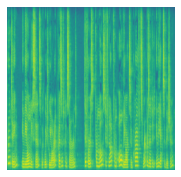

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.io import wavfile

path = Path('New folder').glob('**/*.wav')
wavs = [str(wavf) for wavf in path if wavf.is_file()]
wavs.sort()

number_of_files=len(wavs)

spk_ID = [wavs[i].split('-')[-1].lower() for i in range(number_of_files)]

for i in range(number_of_files):
    samplingfrequency, signaldata = wavfile.read(wavs[i])
    pxx, freq, bins, im = plt.specgram(x=signaldata, Fs=samplingfrequency, noverlap=384, NFFT=512)
    #plot.title('spec of vowel')
    #plot.xlabel('time')
    #plot.ylabel('freq')
    plt.gcf().set_size_inches(3, 3)
    plt.axis('off')
    plt.savefig("spk_ID:{}.png".format(spk_ID[i]), bbox_inches='tight', dpi=100)
    plt.show()
    break
    #output image customized to 3*100 & 3*100 to give = (300,300)


ic| topdir: './New folder'
ic| dest: './New folderimg'
ic| subdirs: ['Real']
ic| p: './New folder\\Real'
ic| dest: './New folderimg\\Realimg'
ic| subdirs: ['fake', 'LJ001-0002.wav', 'LJ001-0003.wav']
ic| p: './New folder\\Real\\fake'
ic| dest: './New folderimg\\Realimg\\fakeimg'
ic| subdirs: ['LJ001-0001.wav']
ic| sv: './New folderimg\\Realimg\\fakeimg\\LJ001-0001'


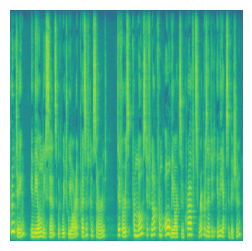

FileNotFoundError: [Errno 2] No such file or directory: './New folder\\Real\\fake\\LJ001-0002.wav'

In [8]:
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from icecream import ic
dir = './New folder'
destination=dir+'images'
topdir = dir
def mkpth(destination):
    if not os.path.exists(destination):
        print(destination)
        os.makedirs(destination)
    return destination
ic(topdir)
# subdirs = os.listdir(topdir)
dest = mkpth(dir+'img')
def wv(topdir,dest):   
    # destt = mkpth(dest+'img')    
    ic(dest)
    subdirs = os.listdir(topdir) 
    ic(subdirs)
    for f in subdirs:
        p = os.path.join(topdir,f)
        if os.path.isdir(p):
            ic(p)
            dest = os.path.join(dest,f)
            destt = mkpth(dest+'img')
            topdir,dest =wv(p,destt)
        elif p.endswith('wav'):            
            samplingfrequency, signaldata = wavfile.read(p)
            pxx, freq, bins, im = plt.specgram(x=signaldata, Fs=samplingfrequency, noverlap=384, NFFT=512)
            # plt.title(f'spec of vowel{p}')
            #plot.xlabel('time')
            #plot.ylabel('freq')
            # ic(im)
            plt.gcf().set_size_inches(3, 3)
            plt.axis('off')
            
            sv = os.path.join(dest,f[:-4])
            ic(sv)
            plt.savefig(sv+'.png',bbox_inches='tight', dpi=100)
            plt.show()
            # break
    return topdir,dest
wv(topdir,dest)

# wavs = [str(wavf) for wavf in path if wavf.is_file()]
# wavs.sort()

# number_of_files=len(wavs)

# spk_ID = [wavs[i].split('-')[-1].lower() for i in range(number_of_files)]

# for i in range(number_of_files):
#     samplingfrequency, signaldata = wavfile.read(wavs[i])
#     pxx, freq, bins, im = plt.specgram(x=signaldata, Fs=samplingfrequency, noverlap=384, NFFT=512)
#     #plot.title('spec of vowel')
#     #plot.xlabel('time')
#     #plot.ylabel('freq')
#     plt.gcf().set_size_inches(3, 3)
#     plt.axis('off')
#     plt.savefig("spk_ID:{}.png".format(spk_ID[i]), bbox_inches='tight', dpi=100)
#     plt.show()
#     break
#     #output image customized to 3*100 & 3*100 to give = (300,300)

ic| topdir: './LJSpeech-1.1'
ic| [os.path.join(i[0],j) for i in os.walk(topdir) for j in i[1]]: ['./LJSpeech-1.1\\wavs']
ic| [i[0] for i in os.walk(topdir)]: ['./LJSpeech-1.1', './LJSpeech-1.1\\wavs']
  0%|                                                                              | 7/13100 [00:02<1:29:16,  2.44it/s]


KeyboardInterrupt: 

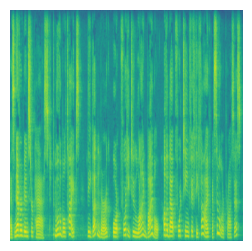

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from icecream import ic
from tqdm import tqdm
dir = './LJSpeech-1.1'
destination=dir+'images'
topdir = dir
def mkpth(destination):
    if not os.path.exists(destination):
        print(destination)
        os.makedirs(destination)
    return destination
ic(topdir)
# subdirs = os.listdir(topdir)
dest = mkpth(dir+'img')
import numpy as np
ic(
    [os.path.join(i[0],j) for i in os.walk(topdir) for j in i[1]]
)
ic(
    [i[0] for i in os.walk(topdir)]
)
dirs =[i[0] for i in os.walk(topdir)] #[os.path.join(i[0],j) for i in os.walk(topdir) for j in i[2]]
def wv(topdir):   
    # destt = mkpth(dest+'img')    
    # ic(dest)
    # subdirs = os.listdir(topdir) 
    # ic(subdirs)
    for subdirs in topdir:
        # dests = mkpth(os.path.join(dest,subdirs))
        # sv = os.path.join(subdirs,f[:-4])
        sv = 'images' + subdirs
        mkpth(sv)
        for f in tqdm(os.listdir(subdirs)):
            p = os.path.join(subdirs,f)
            # if os.path.isdir(p):
            #     # ic(p)
            #     # dest = os.path.join(dest,f)
            #     # dest = mkpth(dest)
            #     # dest = wv(p,dest)
            #     continue
            if p.endswith('wav'):            
                samplingfrequency, signaldata = wavfile.read(p)
                pxx, freq, bins, im = plt.specgram(x=signaldata, Fs=samplingfrequency, noverlap=384, NFFT=512)
                # plt.title(f'spec of vowel{p}')
                #plot.xlabel('time')
                #plot.ylabel('freq')
                # ic(im)
                plt.gcf().set_size_inches(3, 3)
                plt.axis('off')
                
                # sv = os.path.join(dest,f[:-4])
                # sv = 'img' + sv
                # mkpth(sv)
                # ic(sv)
                plt.savefig(os.path.join(sv,f[:-4])+'.png',bbox_inches='tight', dpi=100)
                # plt.show()
                # break
    return 
wv(dirs)

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from icecream import ic
from tqdm import tqdm
import numpy as np
import pandas as pd
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True,nb_workers=12)


def wv(p):  
    import matplotlib.pyplot as plt
    from scipy.io import wavfile
    import os
    from icecream import ic
    from tqdm import tqdm
    import numpy as np
    import pandas as pd
    def mkpth(destination):
        if not os.path.exists(destination):
            print(destination)
            os.makedirs(destination)
        return destination
    # for p in tqdm(dirs):
    f = os.path.basename(p)            
    if p.endswith('wav'):
        topdir = os.path.dirname(p)
        # ic(topdir)
        sv =''
        sv = 'images' + topdir
        mkpth(sv)
        fn = os.path.join(sv,f[:-4])+'.png'
        # if os.path.exists(fn):
        #     pass
        # else:
        samplingfrequency, signaldata = wavfile.read(p)
        pxx, freq, bins, im = plt.specgram(x=signaldata, Fs=samplingfrequency, noverlap=384, NFFT=512)
        # plt.title(f'spec of vowel{p}')
        #plot.xlabel('time')
        #plot.ylabel('freq')
        plt.gcf().set_size_inches(3, 3)
        plt.axis('off')
        # ic(sv)
        plt.savefig(fn,bbox_inches='tight', dpi=100)
        # plt.show()
    return f


topdir = './LJSpeech-1.1'
# destination=dir+'images'
def mkpth(destination):
    if not os.path.exists(destination):
        print(destination)
        os.makedirs(destination)
    return destination
ic(topdir)
dirs =[os.path.join(i[0],j) for i in os.walk(topdir) for j in i[2]] #[i[0] for i in os.walk(topdir)] 

df = pd.DataFrame(dirs,columns=['dirs'])
df['dest'] = 'images' + df['dirs']
df['dest'] = df['dest'].apply(lambda x: x[0:-4]+'.png')
for i,j in enumerate(df['dest']):
    if os.path.exists(j):
        df.drop(i,inplace=True)
df.reset_index(inplace=True,drop=True)
df
_ = df['dirs'].parallel_apply(wv) 
# wv(dirs)

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


ic| topdir: './LJSpeech-1.1'


In [13]:
df['dirs'][0]

'./LJSpeech-1.1\\metadata.csv'

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from icecream import ic
from tqdm import tqdm
dir = './LJSpeech-1.1'
destination=dir+'images'
topdir = dir
def mkpth(destination):
    if not os.path.exists(destination):
        print(destination)
        os.makedirs(destination)
    return destination
ic(topdir)
# subdirs = os.listdir(topdir)
dest = mkpth(dir+'img')
import numpy as np
ic(
    [os.path.join(i[0],j) for i in os.walk(topdir) for j in i[1]]
)
ic(
    [i[0] for i in os.walk(topdir)]
)
dirs =[os.path.join(i[0],j) for i in os.walk(topdir) for j in i[2]] #[i[0] for i in os.walk(topdir)] 
def wv(topdir):   
    # destt = mkpth(dest+'img')    
    # ic(dest)
    # subdirs = os.listdir(topdir) 
    # ic(subdirs)
    # for subdirs in topdir:
        # dests = mkpth(os.path.join(dest,subdirs))
        # sv = os.path.join(subdirs,f[:-4])
        for p in tqdm(topdir):
            # p = os.path.join(subdirs,f)
            f = os.path.basename(p)
            
            # ic(sv)
            # break
            
            if p.endswith('wav'):            
                samplingfrequency, signaldata = wavfile.read(p)
                pxx, freq, bins, im = plt.specgram(x=signaldata, Fs=samplingfrequency, noverlap=384, NFFT=512)
                # plt.title(f'spec of vowel{p}')
                #plot.xlabel('time')
                #plot.ylabel('freq')
                # ic(im)
                plt.gcf().set_size_inches(3, 3)
                plt.axis('off')
                
                # sv = os.path.join(dest,f[:-4])
                # sv = 'img' + sv
                # mkpth(sv)
                # ic(sv)
                topdir = os.path.dirname(p)
                # ic(topdir)
                sv =''
                sv = 'images' + topdir
                mkpth(sv)
                # ic(sv)
                # ic(os.path.join(sv,))
                plt.savefig(os.path.join(sv,f[:-4])+'.png',bbox_inches='tight', dpi=100)
                # plt.show()
                # break
    # return 
# wv(dirs)

from concurrent.futures import ProcessPoolExecutor, as_completed
import multiprocessing
import sys
def print_progress(iteration, total, prefix='', suffix='', decimals=3, bar_length=100):
    """
    Call in a loop to create standard out progress bar

    :param iteration: current iteration
    :param total: total iterations
    :param prefix: prefix string
    :param suffix: suffix string
    :param decimals: positive number of decimals in percent complete
    :param bar_length: character length of bar
    :return: None
    """

    format_str = "{0:." + str(decimals) + "f}"  # format the % done number string
    percents = format_str.format(100 * (iteration / float(total)))  # calculate the % done
    filled_length = int(round(bar_length * iteration / float(total)))  # calculate the filled bar length
    bar = '#' * filled_length + '-' * (bar_length - filled_length)  # generate the bar string
    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percents, '%', suffix)),  # write out the bar
    sys.stdout.flush()  # flush to stdout

# def video_to_frames(video_path, frames_dir, overwrite=False, every=1, chunk_size=1000):
"""
Extracts the frames from a video using multiprocessing

:param video_path: path to the video
:param frames_dir: directory to save the frames
:param overwrite: overwrite frames if they exist?
:param every: extract every this many frames
:param chunk_size: how many frames to split into chunks (one chunk per cpu core process)
:return: path to the directory where the frames were saved, or None if fails
"""

# video_path = os.path.normpath(video_path)  # make the paths OS (Windows) compatible
# frames_dir = os.path.normpath(frames_dir)  # make the paths OS (Windows) compatible

# video_dir, video_filename = os.path.split(video_path)  # get the video path and filename from the path

# make directory to save frames, its a sub dir in the frames_dir with the video name
# os.makedirs(frames_dir, exist_ok=True)

# capture = cv2.VideoCapture(video_path)  # load the video
# total = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))  # get its total frame count
# capture.release()  # release the capture straight away

# if total < 1:  # if video has no frames, might be and opencv error
#     print("Video has no frames. Check your OpenCV + ffmpeg installation")
#     return None  # return None

# frame_chunks = [[i, i + chunk_size] for i in range(0, total, chunk_size)]  # split the frames into chunk lists
# frame_chunks[-1][-1] = min(frame_chunks[-1][-1],
#                            total)  # make sure last chunk has correct end frame, also handles case chunk_size < total
# chunks = np.array_split(dirs, 100)
def chunkss(xs, n):
    n = max(1, n)
    return (xs[i:i+n] for i in range(0, len(xs), n))
def chunksx(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
chunks = chunksx(dirs,1000)
# ic(len(chunks))
# prefix_str = "Extracting frames from {}".format(video_filename)  # a prefix string to be printed in progress bar

# execute across multiple cpu cores to speed up processing, get the count automatically
with ProcessPoolExecutor(max_workers=multiprocessing.cpu_count() - 8) as executor:

    futures = [executor.submit(wv, f) for f in tqdm(chunks)]  # submit the processes: extract_frames(...)

    for i, f in enumerate(as_completed(futures)):  # as each process completes
        print_progress(i, len(chunks) - 1, prefix=None, suffix='Complete')  # print it's progress
# print('\n',os.path.relpath(frames_dir))
# return os.path.relpath(frames_dir)  # when done return the directory containing the frames

ic| topdir: './LJSpeech-1.1'
ic| [os.path.join(i[0],j) for i in os.walk(topdir) for j in i[1]]: ['./LJSpeech-1.1\\wavs']
ic| [i[0] for i in os.walk(topdir)]: ['./LJSpeech-1.1', './LJSpeech-1.1\\wavs']
14it [00:00, 482.63it/s]


In [25]:
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from icecream import ic
from tqdm import tqdm
dir = './LJSpeech-1.1'
destination=dir+'images'
topdir = dir
def mkpth(destination):
    if not os.path.exists(destination):
        print(destination)
        os.makedirs(destination)
    return destination
ic(topdir)
# subdirs = os.listdir(topdir)
dest = mkpth(dir+'img')
import numpy as np
ic(
    [os.path.join(i[0],j) for i in os.walk(topdir) for j in i[1]]
)
ic(
    [i[0] for i in os.walk(topdir)]
)
dirs =[os.path.join(i[0],j) for i in os.walk(topdir) for j in i[2]] #[i[0] for i in os.walk(topdir)] 
def wv(topdir):   
    # destt = mkpth(dest+'img')    
    # ic(dest)
    # subdirs = os.listdir(topdir) 
    # ic(subdirs)
    # for subdirs in topdir:
        # dests = mkpth(os.path.join(dest,subdirs))
        # sv = os.path.join(subdirs,f[:-4])
        for p in tqdm(topdir):
            # p = os.path.join(subdirs,f)
            f = os.path.basename(p)
            
            # ic(sv)
            # break
            
            if p.endswith('wav'):            
                samplingfrequency, signaldata = wavfile.read(p)
                pxx, freq, bins, im = plt.specgram(x=signaldata, Fs=samplingfrequency, noverlap=384, NFFT=512)
                # plt.title(f'spec of vowel{p}')
                #plot.xlabel('time')
                #plot.ylabel('freq')
                # ic(im)
                plt.gcf().set_size_inches(3, 3)
                plt.axis('off')
                
                # sv = os.path.join(dest,f[:-4])
                # sv = 'img' + sv
                # mkpth(sv)
                # ic(sv)
                topdir = os.path.dirname(p)
                # ic(topdir)
                sv =''
                sv = 'images' + topdir
                mkpth(sv)
                # ic(sv)
                # ic(os.path.join(sv,))
                plt.savefig(os.path.join(sv,f[:-4])+'.png',bbox_inches='tight', dpi=100)
                ic(f'saved {f}')
                # plt.show()
                # break
    # return 
# wv(dirs)

from concurrent.futures import ProcessPoolExecutor, as_completed
import multiprocessing
import sys
def print_progress(iteration, total, prefix='', suffix='', decimals=3, bar_length=100):
    """
    Call in a loop to create standard out progress bar

    :param iteration: current iteration
    :param total: total iterations
    :param prefix: prefix string
    :param suffix: suffix string
    :param decimals: positive number of decimals in percent complete
    :param bar_length: character length of bar
    :return: None
    """

    format_str = "{0:." + str(decimals) + "f}"  # format the % done number string
    percents = format_str.format(100 * (iteration / float(total)))  # calculate the % done
    filled_length = int(round(bar_length * iteration / float(total)))  # calculate the filled bar length
    bar = '#' * filled_length + '-' * (bar_length - filled_length)  # generate the bar string
    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percents, '%', suffix)),  # write out the bar
    sys.stdout.flush()  # flush to stdout

# def video_to_frames(video_path, frames_dir, overwrite=False, every=1, chunk_size=1000):
"""
Extracts the frames from a video using multiprocessing

:param video_path: path to the video
:param frames_dir: directory to save the frames
:param overwrite: overwrite frames if they exist?
:param every: extract every this many frames
:param chunk_size: how many frames to split into chunks (one chunk per cpu core process)
:return: path to the directory where the frames were saved, or None if fails
"""

# video_path = os.path.normpath(video_path)  # make the paths OS (Windows) compatible
# frames_dir = os.path.normpath(frames_dir)  # make the paths OS (Windows) compatible

# video_dir, video_filename = os.path.split(video_path)  # get the video path and filename from the path

# make directory to save frames, its a sub dir in the frames_dir with the video name
# os.makedirs(frames_dir, exist_ok=True)

# capture = cv2.VideoCapture(video_path)  # load the video
# total = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))  # get its total frame count
# capture.release()  # release the capture straight away

# if total < 1:  # if video has no frames, might be and opencv error
#     print("Video has no frames. Check your OpenCV + ffmpeg installation")
#     return None  # return None

# frame_chunks = [[i, i + chunk_size] for i in range(0, total, chunk_size)]  # split the frames into chunk lists
# frame_chunks[-1][-1] = min(frame_chunks[-1][-1],
#                            total)  # make sure last chunk has correct end frame, also handles case chunk_size < total
# chunks = np.array_split(dirs, 100)
def chunkss(xs, n):
    n = max(1, n)
    return (xs[i:i+n] for i in range(0, len(xs), n))
def chunksx(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
chunks = list(chunkss(dirs,1000))
if __name__ =='__main__':
    with multiprocessing.Pool(processes=3) as pool:
        results = pool.starmap(wv, chunks)
     # creating processes
    p1 = multiprocessing.Process(target=wv, args=(chunks[0],))
    p2 = multiprocessing.Process(target=wv, args=(chunks[1],))

    # starting process 1
    p1.start()
    
    # starting process 2
    p2.start()
    ic(p1)
    
    # wait until process 1 is finished
    p1.join()
    # wait until process 2 is finished
    p2.join()

    # both processes finished
    print("Done!")# print it's progress
    # print('\n',os.path.relpath(frames_dir))
    # return os.path.relpath(frames_dir)  # when done return the directory containing the frames

ic| topdir: './LJSpeech-1.1'
ic| [os.path.join(i[0],j) for i in os.walk(topdir) for j in i[1]]: ['./LJSpeech-1.1\\wavs']
ic| [i[0] for i in os.walk(topdir)]: ['./LJSpeech-1.1', './LJSpeech-1.1\\wavs']
ic| p1: <Process name='Process-15' pid=16276 parent=12152 stopped exitcode=1>


Done!


In [21]:
list(chunks)

[['./LJSpeech-1.1\\metadata.csv',
  './LJSpeech-1.1\\README',
  './LJSpeech-1.1\\wavs\\LJ001-0001.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0002.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0003.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0004.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0005.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0006.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0007.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0008.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0009.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0010.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0011.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0012.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0013.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0014.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0015.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0016.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0017.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0018.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0019.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0020.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0021.wav',
  './LJSpeech-1.1\\wavs\\LJ001-0022.wav',
  './LJSpeech-

In [13]:
plt.show()

In [14]:
import sys
import numpy as np
import scipy.io.wavfile as wav
import ntpath

from numpy.lib import stride_tricks
from matplotlib import pyplot as plt

output_folder = 'outputs'  # set your output folder and make sure it exists

# short-time Fourier Transformation(STFT)
def stft(sig, frame_size, overlap_factor=0.5, window=np.hanning):
    win = window(frame_size)
    hop_size = int(frame_size - np.floor(overlap_factor * frame_size))

    # zeros at beginning (thus center of 1st window should be for sample nr. 0)   
    samples = np.append(np.zeros(int(np.floor(frame_size / 2.0))), sig)
    # cols for windowing
    cols = np.ceil((len(samples) - frame_size) / float(hop_size)) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frame_size))

    frames = stride_tricks.as_strided(samples, shape=(int(cols), frame_size), strides=(samples.strides[0] * hop_size, samples.strides[0])).copy()
    frames *= win

    return np.fft.rfft(frames)    

def log_scale_spec(spec, sr=44100, factor=20.):
    time_bins, frequency_bins = np.shape(spec)

    scale = np.linspace(0, 1, frequency_bins) ** factor
    scale *= (frequency_bins-1)/max(scale)
    scale = np.unique(np.round(scale))

    # Creates spectrogram with new frequency bins
    new_spectrogram = np.complex128(np.zeros([time_bins, len(scale)]))
    for i in range(0, len(scale)):        
        if i == len(scale)-1:
            new_spectrogram[:,i] = np.sum(spec[:,int(scale[i]):], axis=1)
        else:        
            new_spectrogram[:,i] = np.sum(spec[:,int(scale[i]):int(scale[i+1])], axis=1)

    # Lists center frequency of bins
    all_frequencies = np.abs(np.fft.fftfreq(frequency_bins*2, 1./sr)[:frequency_bins+1])
    frequemcies = []
    for i in range(0, len(scale)):
        if i == len(scale)-1:
            frequemcies += [np.mean(all_frequencies[int(scale[i]):])]
        else:
            frequemcies += [np.mean(all_frequencies[int(scale[i]):int(scale[i+1])])]

    return new_spectrogram, frequemcies

def plot_audio_spectrogram(audio_path, binsize=2**10, plot_path=None, argv = '', colormap="jet"):
    sample_rate, samples = wav.read(audio_path)
    s = stft(samples, binsize)
    new_spectrogram, freq = log_scale_spec(s, factor=1.0, sr=sample_rate)
    data = 20. * np.log10(np.abs(new_spectrogram) / 10e+6)  #dBFS

    time_bins, freq_bins = np.shape(data)

    print("Time bins: ", time_bins)
    print("Frequency bins: ", freq_bins)
    print("Sample rate: ", sample_rate)
    print("Samples: ",len(samples))
    # horizontal resolution correlated with audio length  (samples / sample length = audio length in seconds). If you use this(I've no idea why). I highly recommend to use "gaussian" interpolation.
    #plt.figure(figsize=(len(samples) / sample_rate, freq_bins / 100))
    plt.figure(figsize=(time_bins/100, freq_bins/100)) # resolution equal to audio data resolution, dpi=100 as default
    plt.imshow(np.transpose(data), origin="lower", aspect="auto", cmap=colormap, interpolation="none")

    # Labels
    plt.xlabel("Time(s)")
    plt.ylabel("Frequency(Hz)")
    plt.xlim([0, time_bins-1])
    plt.ylim([0, freq_bins])


    if 'l' in argv: # Add Labels
        plt.colorbar().ax.set_xlabel('dBFS')
    else: # No Labels
        plt.subplots_adjust(left=0,right=1,bottom=0,top=1)
        plt.axis('off')



    x_locations = np.float32(np.linspace(0, time_bins-1, 10))
    plt.xticks(x_locations, ["%.02f" % l for l in ((x_locations*len(samples)/time_bins)+(0.5*binsize))/sample_rate])
    y_locations = np.int16(np.round(np.linspace(0, freq_bins-1, 20)))
    plt.yticks(y_locations, ["%.02f" % freq[i] for i in y_locations])


    if 's' in argv: # Save
        print('Unlabeled output saved as.png')
        plt.savefig(plot_path)
    else:
        print('Graphic interface...')
        plt.show()

    plt.clf()

    return data




In [30]:
sys.argv = ['s' ,"New folder/LJ001-0003.wav",'s']
if len(sys.argv) > 2:
    ims = plot_audio_spectrogram(sys.argv[1], 2**10, output_folder + '/'+ ntpath.basename(sys.argv[1].replace('.wav','')) + '.png',  sys.argv[2])
else:
    ims = plot_audio_spectrogram(sys.argv[1], 2**10, None, '')

Time bins:  417
Frequency bins:  513
Sample rate:  22050
Samples:  213149
Unlabeled output saved as.png


<Figure size 300.24x369.36 with 0 Axes>

In [31]:
from icecream import ic

In [32]:
ic()

ic| 2481222402.py:1 in <cell line: 1>() at 11:08:30.463
